<a href="https://colab.research.google.com/github/sheelapravalika/sheela2000.drdo/blob/main/Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ✅ STEP 1: Import Libraries
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [12]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # ✅ STEP 2: Load CIC-IDS-2017 Dataset
dataset = load_dataset("sonnh-tech1/cic-ids-2017", "binary")
df = dataset["train"].to_pandas()

In [13]:

# ✅ STEP 3: Encode Labels (Benign=0, Threat=1)
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
X = df.drop('Label', axis=1)
y = df['Label']

In [14]:
# ✅ STEP 4: Numeric Features + Scaling
X_numeric = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [15]:

# ✅ STEP 5: Train-Test Split (Stratified for balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [16]:
# ✅ STEP 6: Isolation Forest Model
iso_model = IsolationForest(
    n_estimators=300,        # More trees for stability
    max_samples=0.8,         # Fraction of data per tree
    contamination=0.05,      # Approximate proportion of anomalies (tuned)
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

In [17]:

# ✅ STEP 7: Train the Model
iso_model.fit(X_train)

IsolationForest(contamination=0.05, max_features=0.8, max_samples=0.8,
                n_estimators=300, n_jobs=-1, random_state=42)

In [18]:

# ✅ STEP 8: Predict (Isolation Forest returns -1 for anomaly, 1 for normal)
y_pred = iso_model.predict(X_test)

# Convert (-1 anomaly → 1 threat, 1 normal → 0 benign)
y_pred = np.where(y_pred == -1, 1, 0)

In [19]:
# ✅ STEP 9: Evaluate Performance
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}")
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Test Accuracy: 0.7998

📄 Classification Report:
               precision    recall  f1-score   support

           0     0.8421    0.9622    0.8981    419297
           1     0.0002    0.0153    0.0005       391
           2     0.0000    0.0000    0.0000     25603
           3     0.0000    0.0000    0.0000      2057
           4     0.0000    0.0000    0.0000     34570
           5     0.0000    0.0000    0.0000      1046
           6     0.0000    0.0000    0.0000      1077
           7     0.0000    0.0000    0.0000      1187
           8     0.0000    0.0000    0.0000         2
           9     0.0000    0.0000    0.0000         7
          10     0.0000    0.0000    0.0000     18164
          11     0.0000    0.0000    0.0000       644
          12     0.0000    0.0000    0.0000       294
          13     0.0000    0.0000    0.0000         4
          14     0.0000    0.0000    0.0000       130

    accuracy                         0.7998    504473
   macro avg     0.0562    0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


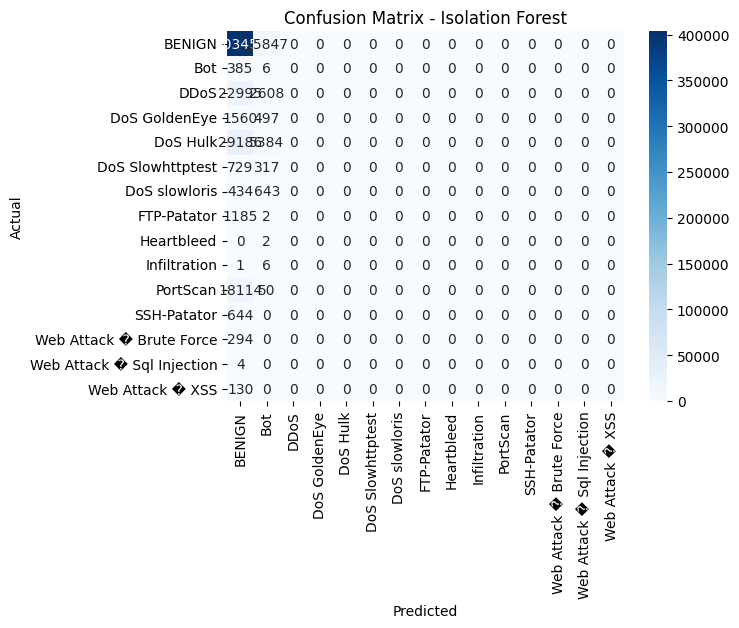

In [20]:
# ✅ STEP 10: Visualize Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Isolation Forest')
plt.show()